In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random

In [2]:
seed = 2020
np.random.seed(seed)  # Numpy module.
random.seed(seed)  # Python random module.
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
plt.close('all')

In [3]:
def preprocess(data):
    #将非数映射数字
    for title in data.columns:
        if data[title].dtype=='object':
            encoder = LabelEncoder()
            data[title] = encoder.fit_transform(data[title])         
    #去均值和方差归一化
    ss = StandardScaler()
    X = data.drop('好瓜',axis=1)
    Y = data['好瓜']
    X = ss.fit_transform(X)
    x,y = np.array(X),np.array(Y).reshape(Y.shape[0],1)
    return x,y
#定义Sigmoid 
def sigmoid(x):
    return 1/(1+np.exp(-x))
#求导
def d_sigmoid(x):
    return x*(1-x)

In [4]:
def standard_BP(x,y,dim=10,eta=0.8,max_iter=500): 
    n_samples = 1
    w1 = np.zeros((x.shape[1],dim))
    w2 = np.zeros((dim,1))
    b1 = np.zeros((n_samples,dim))
    b2 = np.zeros((n_samples,1))
    losslist = []
    for ite in range(max_iter):
        loss_per_ite = []
        for m in range(x.shape[0]):
            xi,yi = x[m,:],y[m,:]
            xi,yi = xi.reshape(1,xi.shape[0]),yi.reshape(1,yi.shape[0])
            ##补充前向传播代码   
            u1 = np.dot(xi,w1)+b1
            out1 = sigmoid(u1)
            u2 = np.dot(out1,w2)+b2
            out2 = sigmoid(u2)
            loss = np.square(yi - out2)/2
            loss_per_ite.append(loss)
            print('iter:%d  loss:%.4f'%(ite,loss[0]))
            ##反向传播
            ##补充反向传播代码
            d_out2 = -(yi - out2)
            d_u2 = d_out2*d_sigmoid(out2)
            d_w2 = np.dot(np.transpose(out1),d_u2)
            d_b2 = d_u2
            d_out1 = np.dot(d_u2,np.transpose(w2))
            d_u1 = d_out1*d_sigmoid(out1)
            d_w1 = np.dot(np.transpose(xi),d_u1)
            d_b1 = d_u1
            ##更新
            w1 = w1 - eta*d_w1
            w2 = w2 - eta*d_w2
            b1 = b1 - eta*d_b1
            b2 = b2 - eta*d_b2
        losslist.append(np.mean(loss_per_ite))
    ##Loss可视化
    plt.figure()
    ##补充Loss可视化代码
    plt.plot([i+1 for i in range(max_iter)],losslist)
    plt.legend(['standard BP'])
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.show()
    return w1,w2,b1,b2

iter:0  loss:0.1250
iter:0  loss:0.0854
iter:0  loss:0.0602
iter:0  loss:0.0446
iter:0  loss:0.0345
iter:0  loss:0.0283
iter:0  loss:0.0234
iter:0  loss:0.0198
iter:0  loss:0.3326
iter:0  loss:0.2879
iter:0  loss:0.2283
iter:0  loss:0.1699
iter:0  loss:0.1177
iter:0  loss:0.0805
iter:0  loss:0.0579
iter:0  loss:0.0431
iter:0  loss:0.0331
iter:1  loss:0.2974
iter:1  loss:0.2404
iter:1  loss:0.1764
iter:1  loss:0.1224
iter:1  loss:0.0837
iter:1  loss:0.0596
iter:1  loss:0.0441
iter:1  loss:0.0345
iter:1  loss:0.2937
iter:1  loss:0.2358
iter:1  loss:0.1747
iter:1  loss:0.1235
iter:1  loss:0.0848
iter:1  loss:0.0599
iter:1  loss:0.0451
iter:1  loss:0.0346
iter:1  loss:0.0272
iter:2  loss:0.3082
iter:2  loss:0.2559
iter:2  loss:0.1945
iter:2  loss:0.1384
iter:2  loss:0.0953
iter:2  loss:0.0664
iter:2  loss:0.0480
iter:2  loss:0.0374
iter:2  loss:0.2880
iter:2  loss:0.2284
iter:2  loss:0.1674
iter:2  loss:0.1171
iter:2  loss:0.0807
iter:2  loss:0.0578
iter:2  loss:0.0433
iter:2  loss:0.0335


iter:64  loss:0.0031
iter:64  loss:0.0112
iter:64  loss:0.0234
iter:64  loss:0.0216
iter:64  loss:0.0012
iter:65  loss:0.0008
iter:65  loss:0.0011
iter:65  loss:0.0023
iter:65  loss:0.0163
iter:65  loss:0.0148
iter:65  loss:0.4965
iter:65  loss:0.4963
iter:65  loss:0.0522
iter:65  loss:0.0017
iter:65  loss:0.0000
iter:65  loss:0.0002
iter:65  loss:0.0000
iter:65  loss:0.0029
iter:65  loss:0.0108
iter:65  loss:0.0220
iter:65  loss:0.0206
iter:65  loss:0.0012
iter:66  loss:0.0008
iter:66  loss:0.0010
iter:66  loss:0.0021
iter:66  loss:0.0157
iter:66  loss:0.0143
iter:66  loss:0.4967
iter:66  loss:0.4966
iter:66  loss:0.0495
iter:66  loss:0.0016
iter:66  loss:0.0000
iter:66  loss:0.0001
iter:66  loss:0.0000
iter:66  loss:0.0027
iter:66  loss:0.0105
iter:66  loss:0.0207
iter:66  loss:0.0195
iter:66  loss:0.0011
iter:67  loss:0.0007
iter:67  loss:0.0010
iter:67  loss:0.0020
iter:67  loss:0.0152
iter:67  loss:0.0137
iter:67  loss:0.4970
iter:67  loss:0.4968
iter:67  loss:0.0469
iter:67  loss

iter:132  loss:0.0001
iter:132  loss:0.0001
iter:132  loss:0.0003
iter:132  loss:0.0035
iter:132  loss:0.0032
iter:132  loss:0.4997
iter:132  loss:0.4997
iter:132  loss:0.0074
iter:132  loss:0.0001
iter:132  loss:0.0000
iter:132  loss:0.0000
iter:132  loss:0.0000
iter:132  loss:0.0003
iter:132  loss:0.0024
iter:132  loss:0.0027
iter:132  loss:0.0030
iter:132  loss:0.0001
iter:133  loss:0.0001
iter:133  loss:0.0001
iter:133  loss:0.0003
iter:133  loss:0.0034
iter:133  loss:0.0031
iter:133  loss:0.4997
iter:133  loss:0.4998
iter:133  loss:0.0073
iter:133  loss:0.0001
iter:133  loss:0.0000
iter:133  loss:0.0000
iter:133  loss:0.0000
iter:133  loss:0.0003
iter:133  loss:0.0023
iter:133  loss:0.0026
iter:133  loss:0.0030
iter:133  loss:0.0001
iter:134  loss:0.0001
iter:134  loss:0.0001
iter:134  loss:0.0003
iter:134  loss:0.0034
iter:134  loss:0.0031
iter:134  loss:0.4998
iter:134  loss:0.4998
iter:134  loss:0.0072
iter:134  loss:0.0001
iter:134  loss:0.0000
iter:134  loss:0.0000
iter:134  

iter:200  loss:0.0001
iter:200  loss:0.0017
iter:200  loss:0.0016
iter:200  loss:0.4999
iter:200  loss:0.4999
iter:200  loss:0.0034
iter:200  loss:0.0000
iter:200  loss:0.0000
iter:200  loss:0.0000
iter:200  loss:0.0000
iter:200  loss:0.0001
iter:200  loss:0.0011
iter:200  loss:0.0012
iter:200  loss:0.0014
iter:200  loss:0.0000
iter:201  loss:0.0000
iter:201  loss:0.0001
iter:201  loss:0.0001
iter:201  loss:0.0016
iter:201  loss:0.0016
iter:201  loss:0.4999
iter:201  loss:0.4999
iter:201  loss:0.0034
iter:201  loss:0.0000
iter:201  loss:0.0000
iter:201  loss:0.0000
iter:201  loss:0.0000
iter:201  loss:0.0001
iter:201  loss:0.0011
iter:201  loss:0.0012
iter:201  loss:0.0014
iter:201  loss:0.0000
iter:202  loss:0.0000
iter:202  loss:0.0001
iter:202  loss:0.0001
iter:202  loss:0.0016
iter:202  loss:0.0016
iter:202  loss:0.4999
iter:202  loss:0.4999
iter:202  loss:0.0033
iter:202  loss:0.0000
iter:202  loss:0.0000
iter:202  loss:0.0000
iter:202  loss:0.0000
iter:202  loss:0.0001
iter:202  

iter:268  loss:0.4999
iter:268  loss:0.0021
iter:268  loss:0.0000
iter:268  loss:0.0000
iter:268  loss:0.0000
iter:268  loss:0.0000
iter:268  loss:0.0001
iter:268  loss:0.0007
iter:268  loss:0.0007
iter:268  loss:0.0008
iter:268  loss:0.0000
iter:269  loss:0.0000
iter:269  loss:0.0000
iter:269  loss:0.0001
iter:269  loss:0.0010
iter:269  loss:0.0010
iter:269  loss:0.4999
iter:269  loss:0.4999
iter:269  loss:0.0021
iter:269  loss:0.0000
iter:269  loss:0.0000
iter:269  loss:0.0000
iter:269  loss:0.0000
iter:269  loss:0.0001
iter:269  loss:0.0007
iter:269  loss:0.0007
iter:269  loss:0.0008
iter:269  loss:0.0000
iter:270  loss:0.0000
iter:270  loss:0.0000
iter:270  loss:0.0001
iter:270  loss:0.0010
iter:270  loss:0.0010
iter:270  loss:0.4999
iter:270  loss:0.4999
iter:270  loss:0.0021
iter:270  loss:0.0000
iter:270  loss:0.0000
iter:270  loss:0.0000
iter:270  loss:0.0000
iter:270  loss:0.0001
iter:270  loss:0.0007
iter:270  loss:0.0007
iter:270  loss:0.0008
iter:270  loss:0.0000
iter:271  

iter:337  loss:0.0000
iter:337  loss:0.0000
iter:337  loss:0.0001
iter:337  loss:0.0007
iter:337  loss:0.0008
iter:337  loss:0.5000
iter:337  loss:0.5000
iter:337  loss:0.0015
iter:337  loss:0.0000
iter:337  loss:0.0000
iter:337  loss:0.0000
iter:337  loss:0.0000
iter:337  loss:0.0001
iter:337  loss:0.0005
iter:337  loss:0.0005
iter:337  loss:0.0006
iter:337  loss:0.0000
iter:338  loss:0.0000
iter:338  loss:0.0000
iter:338  loss:0.0001
iter:338  loss:0.0007
iter:338  loss:0.0007
iter:338  loss:0.5000
iter:338  loss:0.5000
iter:338  loss:0.0015
iter:338  loss:0.0000
iter:338  loss:0.0000
iter:338  loss:0.0000
iter:338  loss:0.0000
iter:338  loss:0.0001
iter:338  loss:0.0005
iter:338  loss:0.0005
iter:338  loss:0.0006
iter:338  loss:0.0000
iter:339  loss:0.0000
iter:339  loss:0.0000
iter:339  loss:0.0000
iter:339  loss:0.0007
iter:339  loss:0.0007
iter:339  loss:0.5000
iter:339  loss:0.5000
iter:339  loss:0.0015
iter:339  loss:0.0000
iter:339  loss:0.0000
iter:339  loss:0.0000
iter:339  

iter:404  loss:0.0000
iter:404  loss:0.0000
iter:404  loss:0.0000
iter:404  loss:0.0006
iter:404  loss:0.0006
iter:404  loss:0.5000
iter:404  loss:0.5000
iter:404  loss:0.0012
iter:404  loss:0.0000
iter:404  loss:0.0000
iter:404  loss:0.0000
iter:404  loss:0.0000
iter:404  loss:0.0000
iter:404  loss:0.0004
iter:404  loss:0.0004
iter:404  loss:0.0005
iter:404  loss:0.0000
iter:405  loss:0.0000
iter:405  loss:0.0000
iter:405  loss:0.0000
iter:405  loss:0.0006
iter:405  loss:0.0006
iter:405  loss:0.5000
iter:405  loss:0.5000
iter:405  loss:0.0012
iter:405  loss:0.0000
iter:405  loss:0.0000
iter:405  loss:0.0000
iter:405  loss:0.0000
iter:405  loss:0.0000
iter:405  loss:0.0004
iter:405  loss:0.0004
iter:405  loss:0.0005
iter:405  loss:0.0000
iter:406  loss:0.0000
iter:406  loss:0.0000
iter:406  loss:0.0000
iter:406  loss:0.0006
iter:406  loss:0.0006
iter:406  loss:0.5000
iter:406  loss:0.5000
iter:406  loss:0.0011
iter:406  loss:0.0000
iter:406  loss:0.0000
iter:406  loss:0.0000
iter:406  

iter:466  loss:0.0000
iter:466  loss:0.0000
iter:466  loss:0.0003
iter:466  loss:0.0003
iter:466  loss:0.0004
iter:466  loss:0.0000
iter:467  loss:0.0000
iter:467  loss:0.0000
iter:467  loss:0.0000
iter:467  loss:0.0005
iter:467  loss:0.0005
iter:467  loss:0.5000
iter:467  loss:0.5000
iter:467  loss:0.0009
iter:467  loss:0.0000
iter:467  loss:0.0000
iter:467  loss:0.0000
iter:467  loss:0.0000
iter:467  loss:0.0000
iter:467  loss:0.0003
iter:467  loss:0.0003
iter:467  loss:0.0004
iter:467  loss:0.0000
iter:468  loss:0.0000
iter:468  loss:0.0000
iter:468  loss:0.0000
iter:468  loss:0.0005
iter:468  loss:0.0005
iter:468  loss:0.5000
iter:468  loss:0.5000
iter:468  loss:0.0009
iter:468  loss:0.0000
iter:468  loss:0.0000
iter:468  loss:0.0000
iter:468  loss:0.0000
iter:468  loss:0.0000
iter:468  loss:0.0003
iter:468  loss:0.0003
iter:468  loss:0.0004
iter:468  loss:0.0000
iter:469  loss:0.0000
iter:469  loss:0.0000
iter:469  loss:0.0000
iter:469  loss:0.0005
iter:469  loss:0.0005
iter:469  

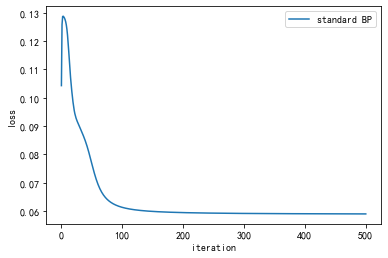

In [5]:
data = pd.read_table('watermelon30.txt',delimiter=',')
data.drop('编号',axis=1,inplace=True)
x,y = preprocess(data)
dim = 10
w1,w2,b1,b2 = standard_BP(x,y,dim)
#根据当前的x，预测其类别；
u1 = np.dot(x,w1)+b1
out1 = sigmoid(u1)
u2 = np.dot(out1,w2)+b2
out2 = sigmoid(u2)  
y_pred = np.round(out2)
result = pd.DataFrame(np.hstack((y,y_pred)),columns=['真值','预测'] )     
result.to_excel('result.xlsx',index=False)